## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

4.14.3


## Reading csv file into dataframe

In [3]:
df = pd.read_csv('report.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
index            151 non-null int64
activity_type    151 non-null object
duration         151 non-null object
from             151 non-null object
to               151 non-null object
comment          3 non-null object
dtypes: int64(1), object(5)
memory usage: 7.2+ KB


In [5]:
df.head()

,index,activity_type,duration,from,to,comment
0,0,Video games,01:43,2017-07-01 21:34,2017-07-01 23:17,NaN
1,1,In computer,00:03,2017-07-01 21:29,2017-07-01 21:32,NaN
2,2,At home,13:35,2017-07-01 21:13,2017-07-02 10:49,NaN
3,3,In computer,00:05,2017-07-01 21:08,2017-07-01 21:13,NaN
4,4,Eat,00:18,2017-07-01 20:49,2017-07-01 21:07,NaN


In [6]:
df['activity_type'].value_counts()

Walk                                    29
In bus                                  19
In computer                             18
Eat                                     18
At home                                 11
Train                                    9
In vehicle                               8
Video games                              6
Meeting                                  5
Cooking                                  4
Pause                                    4
Movie                                    3
Shop                                     3
Work                                     2
Walking&party                            2
Running                                  2
On bus stop                              1
Sleep                                    1
Picnic                                   1
Football                                 1
Phone was out of the pocket (forgot)     1
Shopping& wearing                        1
Watching TV                              1
Took off gl

## Removing the unwanted data (comment)

In [7]:
df['comment'].value_counts()

Approximately    3
Name: comment, dtype: int64

In [8]:
df.dropna()

,index,activity_type,duration,from,to,comment
74,2,Football,02:35,2017-07-09 09:50,2017-07-09 12:25,Approximately
75,3,In vehicle,00:12,2017-07-09 09:24,2017-07-09 09:36,Approximately
103,5,Eat,00:19,2017-07-11 13:15,2017-07-11 13:34,Approximately


In [9]:
df.drop('comment',axis=1,inplace=True)

## Analysing Duration of a particular activity

In [10]:
df.head()

,index,activity_type,duration,from,to
0,0,Video games,01:43,2017-07-01 21:34,2017-07-01 23:17
1,1,In computer,00:03,2017-07-01 21:29,2017-07-01 21:32
2,2,At home,13:35,2017-07-01 21:13,2017-07-02 10:49
3,3,In computer,00:05,2017-07-01 21:08,2017-07-01 21:13
4,4,Eat,00:18,2017-07-01 20:49,2017-07-01 21:07


In [11]:
df['duration'].iloc[0]

'01:43'

In [12]:
def myfunc(dur):
    [hr,minute] = map(int,dur.split(':'))
    return hr*60+minute

In [13]:
df['duration in min'] = df['duration'].apply(myfunc)

In [14]:
df.head()

,index,activity_type,duration,from,to,duration in min
0,0,Video games,01:43,2017-07-01 21:34,2017-07-01 23:17,103
1,1,In computer,00:03,2017-07-01 21:29,2017-07-01 21:32,3
2,2,At home,13:35,2017-07-01 21:13,2017-07-02 10:49,815
3,3,In computer,00:05,2017-07-01 21:08,2017-07-01 21:13,5
4,4,Eat,00:18,2017-07-01 20:49,2017-07-01 21:07,18


In [15]:
df.iplot(kind='bar',x='activity_type',y='duration in min')

## Analysing the TimeStamp

In [16]:
type(df['from'].iloc[0])

str

In [17]:
df['Start Time'] = pd.to_datetime(df['from'])
df['End Time'] = pd.to_datetime(df['to'])

In [18]:
df['Hour'] = df['Start Time'].apply(lambda time: time.hour)
df['Month'] = df['Start Time'].apply(lambda time: time.month)
df['Day of Week'] = df['Start Time'].apply(lambda time: time.dayofweek)

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [20]:
df.head()

,index,activity_type,duration,from,to,duration in min,Start Time,End Time,Hour,Month,Day of Week
0,0,Video games,01:43,2017-07-01 21:34,2017-07-01 23:17,103,2017-07-01 21:34:00,2017-07-01 23:17:00,21,7,Sat
1,1,In computer,00:03,2017-07-01 21:29,2017-07-01 21:32,3,2017-07-01 21:29:00,2017-07-01 21:32:00,21,7,Sat
2,2,At home,13:35,2017-07-01 21:13,2017-07-02 10:49,815,2017-07-01 21:13:00,2017-07-02 10:49:00,21,7,Sat
3,3,In computer,00:05,2017-07-01 21:08,2017-07-01 21:13,5,2017-07-01 21:08:00,2017-07-01 21:13:00,21,7,Sat
4,4,Eat,00:18,2017-07-01 20:49,2017-07-01 21:07,18,2017-07-01 20:49:00,2017-07-01 21:07:00,20,7,Sat


## Plot- Count of activity_type vs Month

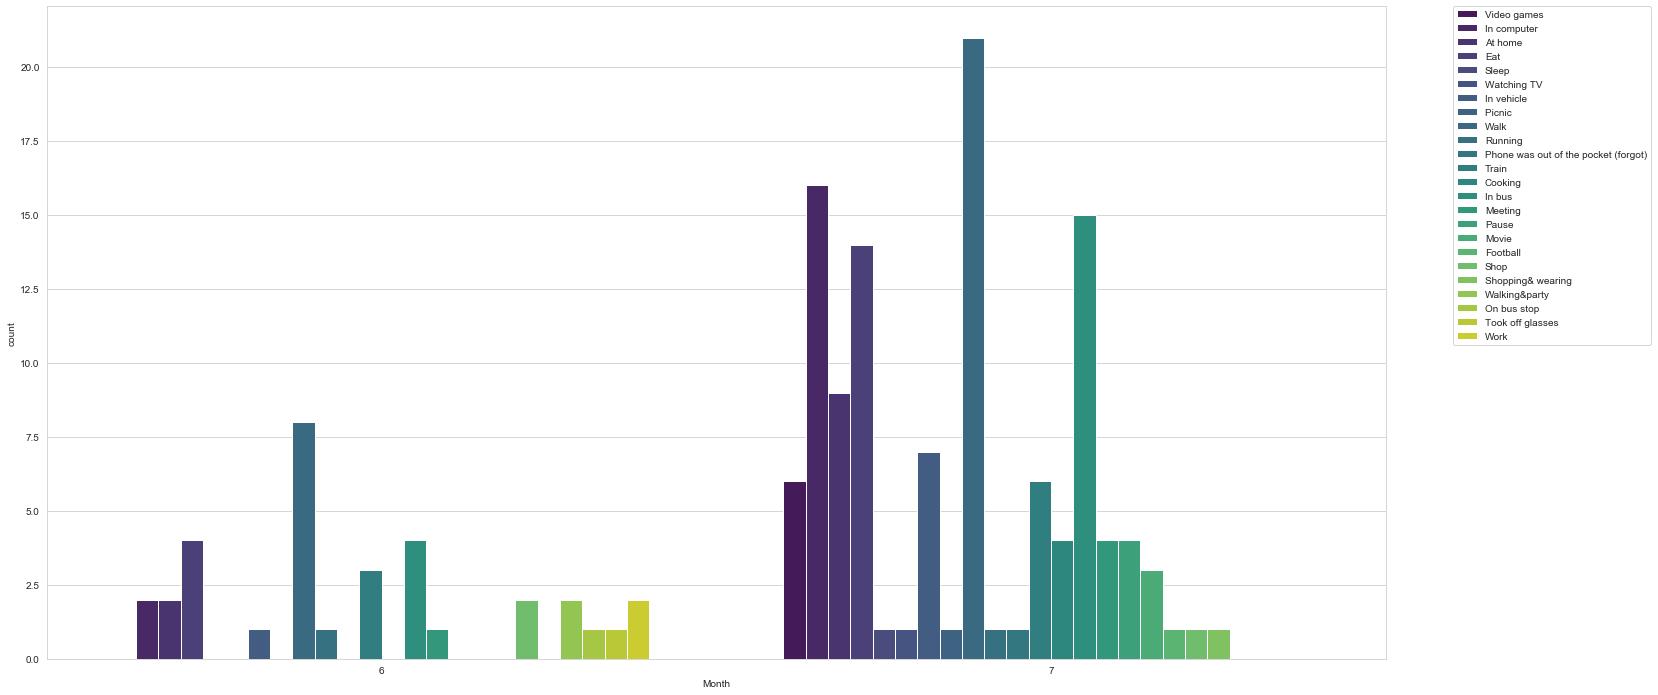

In [21]:
plt.figure(figsize = (24,12))
sns.countplot(x='Month',data=df,hue='activity_type',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Plots showing count of different activities in a week

In [22]:
df.iplot(kind='bar',x='Day of Week',y='activity_type')

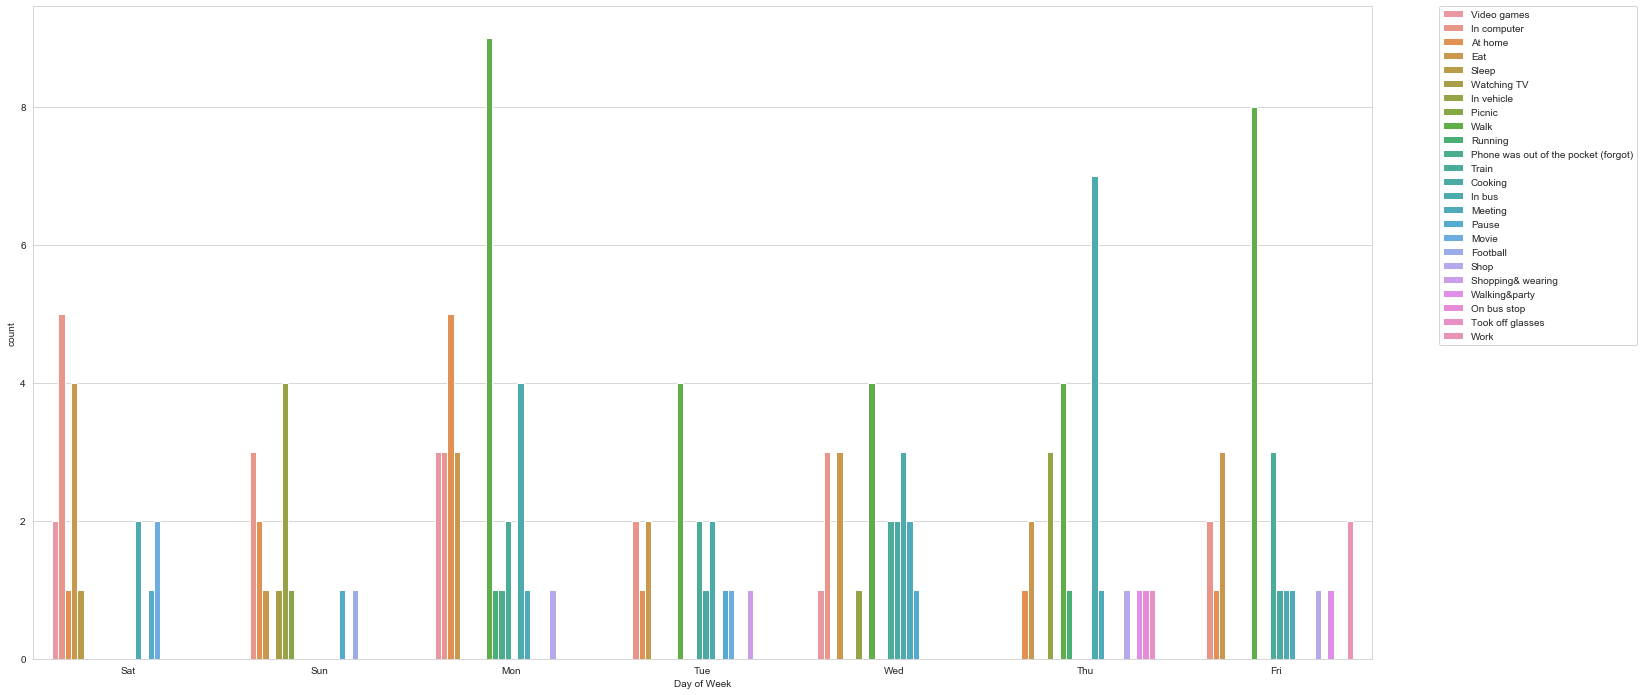

In [23]:
plt.figure(figsize=(24,12))
sns.countplot(x='Day of Week',data=df,hue='activity_type')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [24]:
df.iplot(kind='scatter',x='Day of Week',y='activity_type',mode='markers',size=10)

## Activity vs Day

In [25]:
def daytime(num):
    if(5<= num<12):
        return 'Morning'
    elif(12<= num < 17):
        return 'Afternoon'
    elif(17<= num <24 or 0<= num <5):
        return 'Evening'


In [26]:
df.head()

,index,activity_type,duration,from,to,duration in min,Start Time,End Time,Hour,Month,Day of Week
0,0,Video games,01:43,2017-07-01 21:34,2017-07-01 23:17,103,2017-07-01 21:34:00,2017-07-01 23:17:00,21,7,Sat
1,1,In computer,00:03,2017-07-01 21:29,2017-07-01 21:32,3,2017-07-01 21:29:00,2017-07-01 21:32:00,21,7,Sat
2,2,At home,13:35,2017-07-01 21:13,2017-07-02 10:49,815,2017-07-01 21:13:00,2017-07-02 10:49:00,21,7,Sat
3,3,In computer,00:05,2017-07-01 21:08,2017-07-01 21:13,5,2017-07-01 21:08:00,2017-07-01 21:13:00,21,7,Sat
4,4,Eat,00:18,2017-07-01 20:49,2017-07-01 21:07,18,2017-07-01 20:49:00,2017-07-01 21:07:00,20,7,Sat


In [27]:
df['DayTime'] = df['Hour'].apply(daytime)

In [28]:
df.head()

,index,activity_type,duration,from,to,duration in min,Start Time,End Time,Hour,Month,Day of Week,DayTime
0,0,Video games,01:43,2017-07-01 21:34,2017-07-01 23:17,103,2017-07-01 21:34:00,2017-07-01 23:17:00,21,7,Sat,Evening
1,1,In computer,00:03,2017-07-01 21:29,2017-07-01 21:32,3,2017-07-01 21:29:00,2017-07-01 21:32:00,21,7,Sat,Evening
2,2,At home,13:35,2017-07-01 21:13,2017-07-02 10:49,815,2017-07-01 21:13:00,2017-07-02 10:49:00,21,7,Sat,Evening
3,3,In computer,00:05,2017-07-01 21:08,2017-07-01 21:13,5,2017-07-01 21:08:00,2017-07-01 21:13:00,21,7,Sat,Evening
4,4,Eat,00:18,2017-07-01 20:49,2017-07-01 21:07,18,2017-07-01 20:49:00,2017-07-01 21:07:00,20,7,Sat,Evening


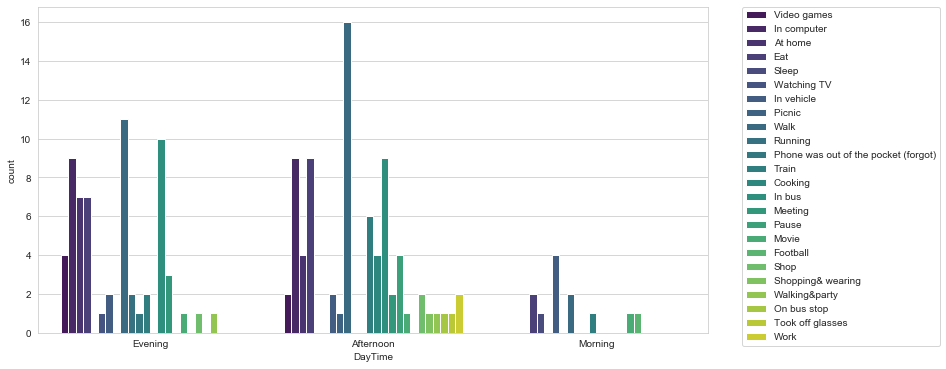

In [29]:
plt.figure(figsize = (12,6))
sns.countplot(x='DayTime',data=df,hue='activity_type',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)